YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0024
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 9.5520e-05
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.1071e-04
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.2921e-05
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.8647e-05
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.6904e-05
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.1011e-05
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.1571e-05
Epoch 9/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.8219e-05
Epoch 10/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.0326e-05
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Mean Absolute Error (MAE): 4.768979513070446
R-squared (R²): 0.91416313169717


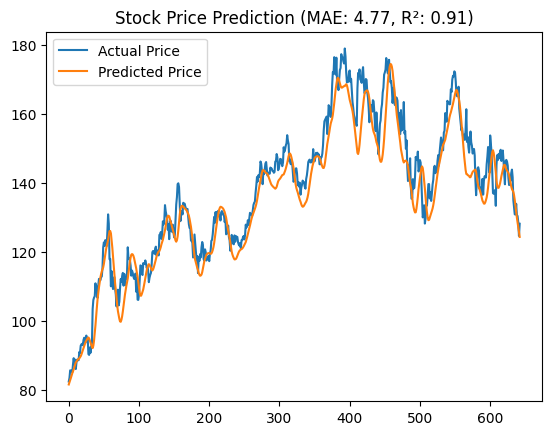

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Download stock data
df = yf.download('AAPL', start='2010-01-01', end='2023-01-01')
data = df['Close'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length-1):
        X.append(data[i:(i+seq_length), 0])
        y.append(data[i+seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Split data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Performance metrics
mae = mean_absolute_error(actual_prices, predictions)
r2 = r2_score(actual_prices, predictions)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

# Plot results
plt.plot(actual_prices, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.legend()
plt.title(f"Stock Price Prediction (MAE: {mae:.2f}, R²: {r2:.2f})")
plt.show()